<a href="https://colab.research.google.com/github/SHASHANK8412/IRIS/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Write a Python program to load the iris data from a given csv file into a dataframe and
#print the shape of the data, type of the data and first 3 rows.
import pandas as pd
x=pd.read_csv('Iris.csv')
df=pd.DataFrame(x)
print(df.shape)
print(df.dtypes)
df.head(3)

FileNotFoundError: [Errno 2] No such file or directory: 'Iris.csv'

In [ ]:
#. Write a Python program using Scikit-learn to print the keys, number of rows-columns,
#feature names and the description of the Iris data.
from sklearn.datasets import load_iris
iris=load_iris()
print(iris.keys())
print(iris.data.shape)
print(iris.feature_names)
print(iris.DESCR)

In [ ]:
#Write a Python program to get the number of observations, missing values and nan
#values.
print(df.isna().sum())
print(df.isnull().sum())

In [ ]:
#Write a Python program to view basic statistical details like percentile, mean, std etc.
#of iris data.
df.describe()

In [ ]:
#Write a Python program to get observations of each species (setosa, versicolor,
#virginica) from iris data.
df.groupby('Species').count()

In [ ]:
#Write a Python program to drop Id column from a given Dataframe and print the
#modified part. Call iris.csv to create the Dataframe.
import pandas as pd

df = pd.read_csv('Iris.csv')


df_modified = df.drop('Id', axis=1)


print(df_modified)



In [ ]:
#Write a Python program to access first four cells from a given Dataframe using the
#index and column labels. Call iris.csv to create the Dataframe.
first_row_labels = df.columns[:4]
first_four_cells = df.loc[0, first_row_labels]
print(first_four_cells)

In [ ]:
#Write a Python program to create a plot to get a general Statistics of Iris data.
import matplotlib.pyplot as plt
df.drop('Id', axis=1, inplace=True)
df.plot(kind='box', subplots=True, layout=(2,2), figsize=(10,6))
plt.tight_layout()
plt.show()


In [3]:
#9. Write a Python program to create a Bar plot to get the frequency of the three species
#of the Iris data.
species_count = df['Species'].value_counts()
species_count.plot(kind='bar', title='Frequency of Iris Species', color='skyblue')
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.show()


NameError: name 'df' is not defined

In [ ]:
#10. Write a Python program to create a Pie plot to get the frequency of the three species of
#the Iris data.
species_count = df['Species'].value_counts()
species_count.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Species Distribution')
plt.ylabel('')
plt.show()

In [ ]:
#11. Write a Python program to create a graph to find relationship between the sepal length
#and width.
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c='green')
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.grid(True)
plt.show()

In [ ]:
#Write a Python program to create a graph to find relationship between the petal length
#and width.
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], color='purple')
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.grid(True)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')
sns.pairplot(df, hue='species')
plt.show()


In [ ]:
#Write a Python program to create a joinplot to describe individual distributions on the
#same plot between Sepal length and Sepal width.

import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')
sns.jointplot(x='sepal_length', y='sepal_width', data=df, kind='scatter', color='green')
plt.show()


WEEK-3 (SALES AND SATISFACTION)

In [ ]:
import pandas as pd
x=pd.read_csv('sales.csv')
df=pd.DataFrame(x)
print(df.isna().sum())
print(df.shape)
df1=df.dropna()
df1

In [ ]:
df1['Purchase_Made'].replace({'Yes': 1, 'No': 0}, inplace=True)
df1['purchased'] = df1['Purchase_Made']
df1
df2 = df1.drop(columns=['purchased'])
df2


In [ ]:
# Select numeric columns only
numeric_df = df2.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()
print(corr_matrix)
df

In [ ]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
x=pd.read_csv('player.csv')
df=pd.DataFrame(x)
df

In [ ]:
# Drop duplicates and fill missing values
df.drop_duplicates(inplace=True)
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Detect constant features
selector = VarianceThreshold(threshold=0)
selector.fit(df)

# Get constant columns
constant_columns = df.columns[~selector.get_support()]
print("🚫 Constant Features:")
print(constant_columns.tolist())

# Drop constant features
df_constant_removed = df.drop(columns=constant_columns)

In [4]:
# 📦 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# 📁 Load the dataset
df = pd.read_csv("player.csv")

# 🔍 Inspect
print("Original Shape:", df.shape)
print(df.head())

# 🧹 Step 1: Clean missing values
# Drop columns with >90% missing values
missing_ratio = df.isnull().mean()
df.drop(columns=missing_ratio[missing_ratio > 0.9].index, inplace=True)

# Fill missing values: median for numeric, mode for categorical
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Step 2: Encode categorical columns using LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# 🎯 Define X and y
X = df.drop(columns=['weight'])  # Use 'weight' as target
y = df['weight']

# 🔀 Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

print("\nOriginal Train Shape:", X_train.shape)

# ✅ Step 3: Constant Features
constant_features = [
    col for col in X_train.select_dtypes(include=[np.number]).columns
    if X_train[col].std() == 0
]

print("\n🚫 Constant Features:")
print(constant_features)

# Drop them
X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)

print("After Removing Constant Features:", X_train.shape)

# ✅ Step 4: Quasi-Constant Features (>99% same value)
quasi_constant_features = []
for col in X_train.columns:
    if X_train[col].value_counts(normalize=True).max() > 0.99:
        quasi_constant_features.append(col)

print("\n⚠️ Quasi-Constant Features (>99% same value):")
print(quasi_constant_features)

# Drop them
X_train.drop(labels=quasi_constant_features, axis=1, inplace=True)
X_test.drop(labels=quasi_constant_features, axis=1, inplace=True)

print("After Removing Quasi-Constant Features:", X_train.shape)

# ✅ Step 5: Mutual Information (for Regression)
mi_scores = mutual_info_regression(X_train, y_train, discrete_features='auto')
mi_series = pd.Series(mi_scores, index=X_train.columns).sort_values(ascending=False)

print("\n📊 Top Features by Mutual Information with 'weight':")
print(mi_series)

# Final Shape
print("\n✅ Final X_train Shape:", X_train.shape)
print("✅ Final X_test Shape:", X_test.shape)


FileNotFoundError: [Errno 2] No such file or directory: 'player.csv'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("/content/player.csv")

# Drop duplicates
df.drop_duplicates(inplace=True)

# Fill missing values correctly (NO inplace warning)
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# Encode categorical features
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Define features and target
X = df.drop(columns=['weight'])
y = df['weight']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Detect constant features
constant_features = [col for col in X_train.columns if X_train[col].std() == 0]
print("🚫 Constant Features:")
print(constant_features)

# Drop them
X_train.drop(columns=constant_features, inplace=True)
X_test.drop(columns=constant_features, inplace=True)


In [ ]:
# Detect quasi-constant features (>99% same value)
quasi_constant_features = []
for col in X_train.columns:
    top_freq = X_train[col].value_counts(normalize=True).max()
    if top_freq > 0.99:
        quasi_constant_features.append(col)

print("⚠️ Quasi-Constant Features (>99% same value):")
print(quasi_constant_features)

# Drop quasi-constant features
X_train.drop(columns=quasi_constant_features, inplace=True)
X_test.drop(columns=quasi_constant_features, inplace=True)


In [ ]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

# Calculate Mutual Information scores
mi_scores = mutual_info_regression(X_train, y_train, discrete_features='auto')

# Create a sorted series
mi_series = pd.Series(mi_scores, index=X_train.columns).sort_values(ascending=False)

# Display top features
print("📊 Top Features by Mutual Information with 'weight':")
print(mi_series)


WEEK-4


In [5]:
#Loading the dataset
import pandas as pd
x=pd.read_csv("/content/drive/MyDrive/Datasets/titanic_train.csv")
df=pd.DataFrame(x)

#checking for the null values and handling them
print(df.isna().sum())

df1=df.dropna()
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [7]:
#Checking for constant features

numeric_df = df1.select_dtypes(include=['int64', 'float64'])
constant_features=[col for col in numeric_df.columns if numeric_df[col].std()==0]

print(constant_features)

[]


In [8]:
#Checking for Quasi-constant features

threshold=0.98

quasi_constant_features=[]
df2 = df1.select_dtypes(include=['int64', 'float64'])
for col in df2.columns:
  top_freq=df2[col].value_counts(normalize=True).values[0]
  if top_freq>threshold:
    quasi_constant_features.append(col)
print(quasi_constant_features)

[]


In [9]:
#Checking for duplicate features
duplicate_features=[]
for i in range(len(df1.columns)):
  for j in range(i+1,len(df1.columns)):
    col1=df1.columns[i]
    col2=df1.columns[j]

    if df1[col1].equals(df1[col2]):
      duplicate_features.append(col2)


duplicate_features=list(set(duplicate_features))

print(duplicate_features)



[]


Correlation Matrix:
              PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000  0.148495 -0.089136  0.030933 -0.083488 -0.051454   
Survived        0.148495  1.000000 -0.034542 -0.254085  0.106346  0.023582   
Pclass         -0.089136 -0.034542  1.000000 -0.306514 -0.103592  0.047496   
Age             0.030933 -0.254085 -0.306514  1.000000 -0.156162 -0.271271   
SibSp          -0.083488  0.106346 -0.103592 -0.156162  1.000000  0.255346   
Parch          -0.051454  0.023582  0.047496 -0.271271  0.255346  1.000000   
Fare            0.029740  0.134241 -0.315235 -0.092424  0.286433  0.389740   

                 Fare  
PassengerId  0.029740  
Survived     0.134241  
Pclass      -0.315235  
Age         -0.092424  
SibSp        0.286433  
Parch        0.389740  
Fare         1.000000  


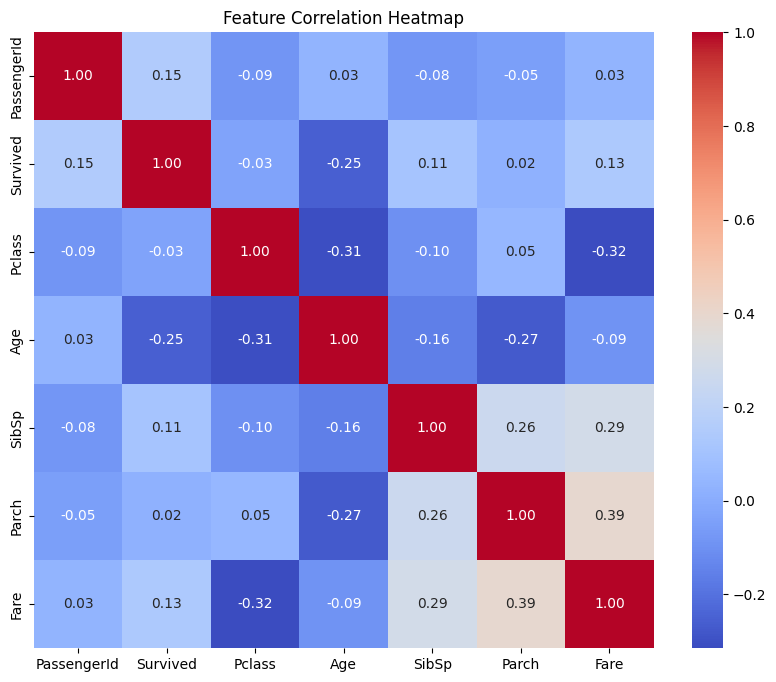

In [10]:
#Checking For correlation
df_numeric=df1.select_dtypes(include=['float64','int64'])
corr_matrix=df_numeric.corr()

print("Correlation Matrix:\n",corr_matrix)

#Visualize
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [11]:
#Mutual Information
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
X=df1.drop(columns='Survived')
y=df1['Survived']

le=LabelEncoder()
for col in X.columns:
  if X[col].dtype=='object':
    X[col]=le.fit_transform(X[col])

mi_scores=mutual_info_classif(X,y)

mi_df=pd.DataFrame(
    {
        'Feature': X.columns,
    'Mutual Information': mi_scores
    }
)

mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)
print("🔍 Mutual Information Scores:")
print(mi_df)





🔍 Mutual Information Scores:
        Feature  Mutual Information
3           Sex            0.152854
4           Age            0.080568
7        Ticket            0.047133
8          Fare            0.044374
6         Parch            0.028389
10     Embarked            0.002656
5         SibSp            0.002225
2          Name            0.000000
1        Pclass            0.000000
0   PassengerId            0.000000
9         Cabin            0.000000


In [12]:
#Chi square test
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

chi_scores,p_values=chi2(X,y)

chi_df=pd.DataFrame(

                    {
                        'Feature':X.columns,
                        'Chi2 Score':chi_scores,
                        'P-Value':p_values
                    }
).sort_values(by='Chi2 Score',ascending=False)


print("Chi-squares scores")
print(chi_df)


Chi-squares scores
        Feature  Chi2 Score        P-Value
0   PassengerId  537.915073  5.358037e-119
8          Fare  242.972795   8.841376e-55
2          Name  125.629862   3.705313e-29
4           Age   80.604591   2.757182e-19
3           Sex   24.945263   5.898127e-07
7        Ticket    1.961335   1.613706e-01
5         SibSp    1.838795   1.750923e-01
10     Embarked    1.329086   2.489679e-01
9         Cabin    0.450111   5.022825e-01
6         Parch    0.121236   7.276974e-01
1        Pclass    0.048383   8.259007e-01


In [13]:
#Anova
from sklearn.feature_selection import f_classif

# Already loaded X and y from above

# Apply ANOVA F-Test
f_scores, p_values = f_classif(X, y)

# Display results
anova_df = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': f_scores,
    'P-Value': p_values
}).sort_values(by='F-Score', ascending=False)

print("📊 ANOVA F-Test Scores:")
print(anova_df)

📊 ANOVA F-Test Scores:
        Feature    F-Score       P-Value
3           Sex  71.605923  8.693868e-15
4           Age  12.491639  5.189503e-04
2          Name   4.144636  4.322421e-02
0   PassengerId   4.081191  4.483734e-02
8          Fare   3.321597  7.002558e-02
5         SibSp   2.070439  1.519053e-01
10     Embarked   1.863299  1.739389e-01
1        Pclass   0.216220  6.424938e-01
6         Parch   0.100716  7.513384e-01
7        Ticket   0.093873  7.596626e-01
9         Cabin   0.020585  8.860758e-01


In [14]:
#mse
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assume X and y already loaded (same as your ANOVA code)
# Train a simple model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Calculate MSE
mse_value = mean_squared_error(y, y_pred)

# Store result in DataFrame (like ANOVA)
mse_df = pd.DataFrame({
    'Metric': ['Mean Squared Error'],
    'Value': [mse_value]
})

print("📉 MSE Score:")
print(mse_df)


📉 MSE Score:
               Metric     Value
0  Mean Squared Error  0.140399


In [15]:
#Wrapper methods-Forward Selection
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
import pandas as pd

# Train model
model = LinearRegression()

# Forward Selection (select top 5 features for example)
forward_selector = SequentialFeatureSelector(model, n_features_to_select=5, direction='forward')
forward_selector.fit(X, y)

# Get selected features
selected_features = X.columns[forward_selector.get_support()]

# Create result DataFrame
forward_df = pd.DataFrame({
    'Selected Feature': selected_features,
    'Rank': range(1, len(selected_features)+1)
})

print("✅ Forward Selection Result:\n")
print(forward_df.to_string(index=False))


✅ Forward Selection Result:

Selected Feature  Rank
     PassengerId     1
            Name     2
             Sex     3
             Age     4
        Embarked     5


In [16]:
#Backward Selection
# Backward Selection (select top 5 features)
backward_selector = SequentialFeatureSelector(model, n_features_to_select=5, direction='backward')
backward_selector.fit(X, y)

backward_features = X.columns[backward_selector.get_support()]

backward_df = pd.DataFrame({
    'Selected Feature': backward_features,
    'Rank': range(1, len(backward_features)+1)
})

print("✅ Backward Selection Result:\n")
print(backward_df.to_string(index=False))


✅ Backward Selection Result:

Selected Feature  Rank
     PassengerId     1
            Name     2
             Sex     3
             Age     4
        Embarked     5


In [17]:
!pip install mlxtend



In [18]:
#Exhaustive Search
from mlxtend.feature_selection import ExhaustiveFeatureSelector

# Exhaustive Search (try between 2 and 5 features)
efs = ExhaustiveFeatureSelector(model,
                                min_features=2,
                                max_features=5,
                                scoring='r2',
                                cv=5)

efs.fit(X, y)

best_features = list(efs.best_feature_names_)

exhaustive_df = pd.DataFrame({
    'Best Subset Feature': best_features,
    'Rank': range(1, len(best_features)+1)
})

print("✅ Exhaustive Search Result:\n")
print(exhaustive_df.to_string(index=False))


Features: 1012/1012

✅ Exhaustive Search Result:

Best Subset Feature  Rank
        PassengerId     1
               Name     2
                Sex     3
                Age     4
           Embarked     5
